In [1]:
import pandas as pd

#### Load the example dataset

In [2]:
data_dir = "https://raw.githubusercontent.com/bd2kccd/py-causal/master/data/charity.txt"
df = pd.read_table(data_dir, sep="\t")

#### Start Java VM

In [3]:
from pycausal.pycausal import pycausal as pc
pc = pc()
pc.start_vm()

#### Create the Prior Knowledge Object

In [4]:
from pycausal import prior as p
forbid = [['TangibilityCondition','Impact']]
require =[['Sympathy','TangibilityCondition']]
tempForbid = p.ForbiddenWithin(['TangibilityCondition','Imaginability'])
temporal = [tempForbid,['Sympathy','AmountDonated'],['Impact']]
prior = p.knowledge(forbiddirect = forbid, requiredirect = require, addtemporal = temporal)
prior

Instance of edu.cmu.tetrad.data.Knowledge2: /knowledge
addtemporal

1*  Imaginability TangibilityCondition
2  AmountDonated Sympathy
3  Impact

forbiddirect
TangibilityCondition Impact

requiredirect
Sympathy TangibilityCondition

#### Load causal algorithms from the py-causal library and Run GFCI

In [5]:
from pycausal import search as s
tetrad = s.tetradrunner()
tetrad.listIndTests()

bdeu-test
cci-test
cg-lr-test
chi-square-test
d-sep-test
disc-bic-test
fisher-z-test
g-square-test
kci-test
mnlrlr-test
mvplr-test
prob-test


In [6]:
tetrad.listScores()

bdeu-score
cci-score
cg-bic-score
cg-other-bic-score
d-sep-score
disc-bic-score
disc-mixed-bic-score
mnlr-bic-score
mvp-bic-score
sem-bic-score


In [7]:
tetrad.getAlgorithmParameters(algoId = 'gfci', testId = 'cg-lr-test', scoreId = 'cg-bic-score')

faithfulnessAssumed: This is a parameter for FGES (“Fast GES”). If this is set to ‘Yes’, it will be assumed that if X _||_ Y, by an independence test, then X _||_ Y | Z for nonempty Z. If the model is faithful to the data, this will necessarily be the case. However, there are some non-faithful examples one can propose where this is not the case. If one is worried about this kind of unfaithfulness, one should set this parameter to ‘No’. If one is willing to tolerate this kind of unfaithfulness, then setting this parameter to ‘Yes’ leads to significantly faster searches. (java.lang.Boolean) [default:true]
maxDegree: It is possible for a random graph to have a single node with very high degree—i.e. number of adjacent edges. This parameter places an upper bound on the maximum such degree. If no limit is to be placed on the maximum degree, use the value -1. (java.lang.Integer) [default:100]
maxPathLength: See Spirtes, Glymour, and Scheines (2000), Causation, Prediction, and Search for the d

In [8]:
tetrad.run(algoId = 'gfci', dfs = df, testId = 'cg-lr-test', scoreId = 'cg-bic-score', 
           priorKnowledge = prior, dataType = 'mixed', numCategoriesToDiscretize = 4,
           maxDegree = 3, maxPathLength = -1,
           completeRuleSetUsed = False, faithfulnessAssumed = True, verbose = True)

#### GFCI Mixed' Result's Nodes

In [9]:
tetrad.getNodes()

['TangibilityCondition',
 'AmountDonated',
 'Sympathy',
 'Imaginability',
 'Impact']

#### GFCI Mixed' Result's Edges

In [10]:
tetrad.getEdges()

['Sympathy o-> Impact',
 'Sympathy --> TangibilityCondition',
 'Imaginability o-> Impact']

#### Plot The Result's Graph

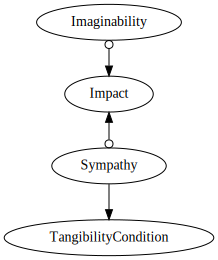

In [11]:
import pydot
from IPython.display import SVG
dot_str = pc.tetradGraphToDot(tetrad.getTetradGraph())
graphs = pydot.graph_from_dot_data(dot_str)
svg_str = graphs[0].create_svg()
SVG(svg_str)

#### Stop Java VM

In [12]:
pc.stop_vm()